
# MLG382 GROUP PROJECT  [100 Marks] 
**Lecturer: _K. Igwe_**


# Your task is to predict *median house values* in Western cape, given a number of features from the districts 


The first question to ask before building a model is what exactly the business objective is. How does the client expect to use and benefit from the model? The objective is important in determining how you will frame the problem, the algorithms to select, the performance measure to use for your model evaluation, and the level of effort you will spend tweaking your model.

In this project, you should assume that your model’s output (a prediction of a district’s median housing price) will be fed to
another Machine Learning system along with many other determinats to better understand the risk of investing in a given area of the Western Cape. The data (home.csv) are provided alonside this notebook. 

This checklist can guide you through the projects.
1. Frame the problem and look at the big picture (done for you).
2. Get the data (made available for you).
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.

### Aim
- Lecturers aim: To expose you to practical applications of ML. 
- Your aim:  to predict median house values in Western cape, given a number of features from the province. 

### Skills Tested
- Basic Python Programming
- EDA
- Use of sklearn Library
- choosing the right model and Building a classification Model
- Understanding and using different evaluation techniques
- Reporting 

### Instructions and Directions
1. _**your code here**_  or  _**your answer here**_ need to be deleted and replaced with your code or answer
2. You may use more than one cell to answer a question
3. Ensure that you include appropriate comment
4. If your code requires special instruction or dependencies to run, please provide these in your submission 

### NOTE: 80% is for meeting requirement, 20% will be awarded based on extra work. I have provided some guide where I enticipate that you may need extra help.

# Contributors:
#### Werner Pretorius : Programming, Modelling, Research, Reporting
#### Zandrei Kleynhans : Programming, Modelling, Research, Reporting
#### Lourens Geyser : Programming, Modelling, Research, Reporting
#### De Wet Kirsten : Programming, Modelling, Research, Reporting
#### Gideon Rossouw

# NB!!! NOTE BEFORE RUNNING THE SCRIPT:

- The functions, located at the bottom of the script, must be run before running the script on a new kernel.
- If the function cells aren't activated, the script will crash the moment it reaches the first call to the "scoresheet()" function.

## RUBRIC

1. Frame the problem and look at the big picture (done for you).
2. Get the data (made available for you).
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models (at least 3) and shortlist the best ones.
6. Fine-tune your models.
7. Present your solution.

##  Frame the problem and look at the big picture (done for you).

In [43]:
# Nothing Required here. Good Luck!

# Imports

In [44]:
# Maths Stuff
import pandas as pd
import numpy as np
from scipy import stats as st

# Plotting Stuff
from matplotlib import pyplot as plt
import seaborn as sns

# Preprocessing Stuff
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Performance Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score

# Model Evaluation
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold

# Pipelining
from sklearn.pipeline import Pipeline

# To calculate class weights => combat label imbalance
from sklearn.utils.class_weight import compute_class_weight

## Get the data (made available for you) [0].

#### First things first, let's import the CSV to get a feel of our dataset

In [45]:
#loading the dataset
home_data = pd.read_csv("home.csv")

# Gives description of the statistical properties of the dataset 
print(home_data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

## Explore the data to gain insights [10] BONUS [5]

#### hints!
- check for correlations: features with the label. And features with one another
- use graphs to illustrate similarities and differences as you deem neccessary
- NOTE: Features with non-linear relationships will have little or no correlation but may still be very instrumental in your predictions
- Test combinations of features (for example, new feature = old_feature1/old_feature2 )

#### Imputation of NaN's and Duplicates

Here we can nicely see where all the NaN Values are located

In [46]:
null_percentage = home_data.isnull().sum()/len(home_data)*100
print(null_percentage)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


Firstly, the *__total_bedrooms__* column seems to be the only one to contain Null values. The imputation of the nulls are not being ignored. Instead, for now,  they will be replaced by the average value in the row, for now. The column will not survive the first filter, i.e. the _feature to feature correlation_ test. It is merely being kept for illustrative purposes. It will later be removed as a result of it being a redundant feature.

Now, to remove the duplicates:

In [47]:
home_data.drop_duplicates(inplace=True)

#### A bit of One-Hot Encoding on Ocean Proximity => Because our machines speak in 1's and 0's, not words.

The manner in which to approach the transformation of the sole categorical feature in the dataset was carefully considered. 

Firstly, off the eye, one might assume that the values of the _ocean_priximity_ feature are ordinally related. However, *_they are not_*. Instead, they can be safely ruled out a Nominal, as ther have no direct or measurable relation to one another.

Secondly, since the feature contains a mere five different categories, and it is nominal, the final decision was made to make use of One-Hot Encoding to tranform it to numerical.

In [48]:
print(home_data["ocean_proximity"].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [49]:
# use dummies to create one new column for every category => creates DataFrame
ohe_prox = pd.get_dummies(home_data["ocean_proximity"])

# add to existing dataset
home_data = home_data.join(ohe_prox).drop(columns=["ocean_proximity"])

#### Dealing with Outliers

Two methods of dealing with outliers were considered. But to undertake either of them, the quartiles, as well as the interquartile range needed to be calculated.

In [50]:
# # Get first quartile
# q1 = np.percentile(home_data[column], 25)
    
# # Get third quartile
# q3 = np.percentile(home_data[column], 75)

# # Calculate IQR
# iqr = p2 - p1

The first method that was considered included removing all rows that contained outliers which would be done as follows:

In [51]:
# home_data = home_data[((home_data < (q1 - 1.5 * iqr)) | (home_data > (q3 + 1.5 * iqr))).any(axis=1)]

This method was, however, discarded on the grounds of the fact that due to the multi-dimensional nature of the dataset, following this route could possibly discard valuable, or even crucial data from all of the features, due to a mere one of them containing an outlier.

In order to find an alternative to the problematic effects of the first method, a second method was considered, which included replacing the outliers of each feature with the median value of that same feature. Which would be done as follows:

In [52]:
# for column in home_data.columns:  
#     home_data[column] = home_data[column].apply(lambda x: np.median(x) if x <= p1-1.5*iqr or x >= p2+1.5*iqr else x)

At the end of the day, even the second method seemed to have harmful effects on the integrity of the data, which was determined from observations based on repeated testing. Furthermore, based on these tests and observations, a final conclusion was drawn to ultimately scrap outlier imputation, as the process seemed to only have detrimental effects on model perfomances across the board.

#### Feature Selection by means of the Filter Method

Using the Pearson's Coefficient Correlation method of the overarching Filter Method, takes place in an iterative manner that involves two phases. First we must obtain and visualise the correlations between all of the features, internally. The aim of this is to identify features that have a high correlation to one another. These features will then pass on to the second phase where they will be assessed based on the their individual correlations to the label.

<AxesSubplot:>

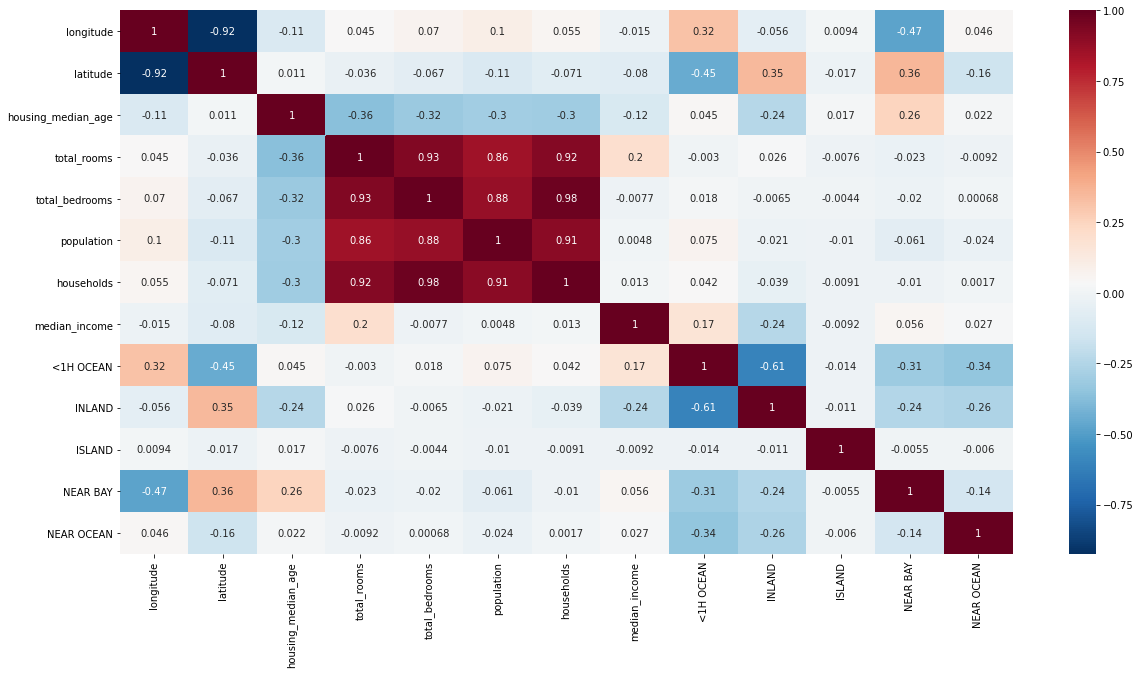

In [53]:
# first we build a matrix that contains the Pearson Correlation Coefficient (PCC) between features with reference to the labels
corr_matrix_feats = home_data.drop(columns=["median_house_value"]).corr()

# next, we isolate the feature column in the matrix that corresponds to the labels
plt.figure(figsize=(20, 10))

# then generate a heatmap to see the correlations of features against the labels => based on the data we just isolated
sns.heatmap(corr_matrix_feats, annot = True, cmap = "RdBu_r")

As stated above, once these highly correlating features have been identified, their individual correlations to the target itself will be assessed, evaluated, and compared. The feature with the lowest correlation to the label out of the two will be dropped. The essential reasoning behind this is that the dropped feature would not contribute anyting to the training data that the other feature could not. It can therefore be ruled out as redundant and dropped in order to reduce 'noise' in the data. 

<AxesSubplot:>

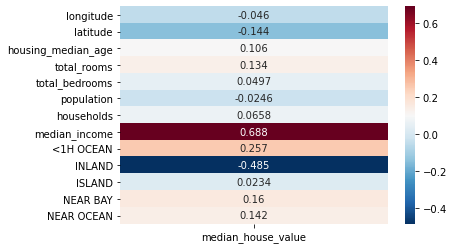

In [54]:
# first we build a matrix that contains the Pearson Correlation Coefficient (PCC) between features with reference to the labels
corr_matrix = home_data.corr()

# next, we isolate the feature column in the matrix that corresponds to the labels
corr_matrix_labels = corr_matrix[["median_house_value"]].drop(labels=["median_house_value"])

# then generate a heatmap to see the correlations of features against the labels => based on the data we just isolated
sns.heatmap(corr_matrix_labels, annot = True, fmt="0.3", cmap = "RdBu_r")

In the following section, redundant features are identified, and removed from the training set.

## Prepare the data to better expose the underlying data patterns to Machine Learning algorithms [20]

#### hint!
- remove the corresponding districts.
- remember to deal with th NA's (you can as well do this before now)
- Scale, Normalize, transform some features (e.g., median income can be put into categroies).
- Set the values to some value (zero, the mean, the median, etc.).


#### Remove Features with High Feature to Feature Correlarion

Obtain features with their scores

In [55]:
scores = corr_matrix_labels.reset_index()

Order the scores in descending order

In [56]:
scores_ordered = scores.reindex(scores["median_house_value"].abs().sort_values(ascending=False).index)

Selecting best features based on scores, for now we selected the top 10.

In [57]:
scores_ordered = scores_ordered[:10]

Assess the Correlations and decise on which Redundant Columns to drop => pass string names into list

In [58]:
redundancies = ['longitude','total_rooms','total_bedrooms','population']

Get the ordered feature names

In [59]:
features_ordered = list(scores_ordered["index"])

Using error handling to remove redundancies from features, otherwise errors may pop up if the feature is not in the dataset due to split decision making that could potentially occur above.

In [60]:
for item in redundancies:
    try:
        features_ordered.remove(item)
    except:
        pass

Gather all those cleaned features into a dataframe

In [61]:
features_df = home_data[features_ordered]

Lets bring everything together => just to make sure our features and targets are still on the same page

In [62]:
home_cleaned = features_df.join(home_data["median_house_value"])

## Transforming Skewed Data

In order to assess the distribution curves of the all of the columns, histograms would provide the necessary information from which the necessary insights can be derived, which could then be used to consider features which need to be transformed based on the direction of their skewing. Note that the One-Hot Encoded columns are binary in terms of their values, and are thus excluded from the assessment, as they cannot be plotted on histograms, and they will display no skewing. They can be evaluated based only on their correlations as illustrated above.


Distribution Curve : longitude



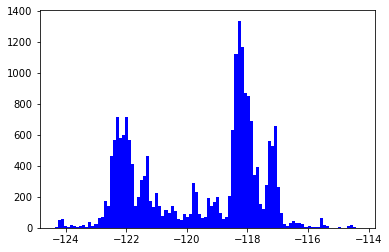


Distribution Curve : latitude



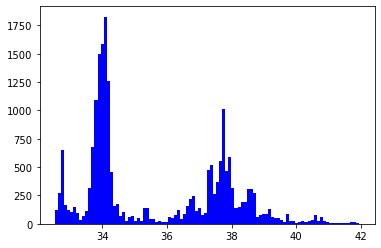


Distribution Curve : housing_median_age



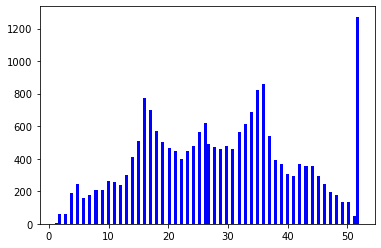


Distribution Curve : total_rooms



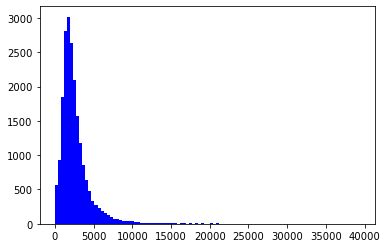


Distribution Curve : total_bedrooms



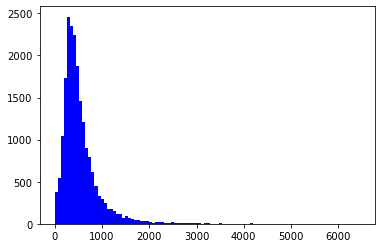


Distribution Curve : population



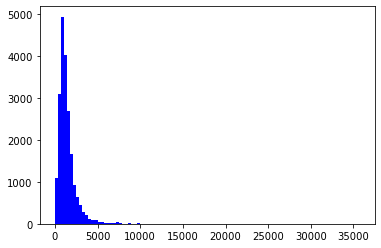


Distribution Curve : households



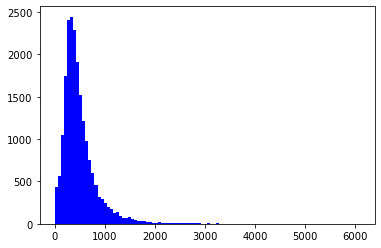


Distribution Curve : median_income



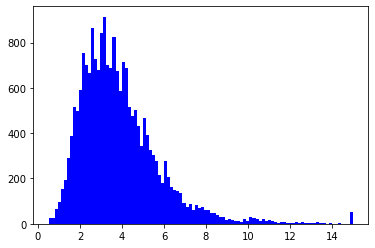


Distribution Curve : median_house_value



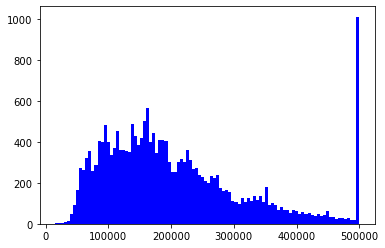


Distribution Curve : <1H OCEAN



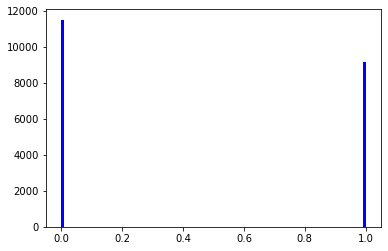


Distribution Curve : INLAND



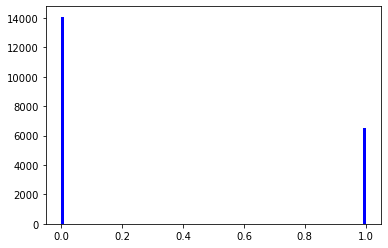


Distribution Curve : ISLAND



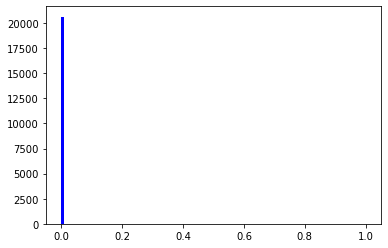


Distribution Curve : NEAR BAY



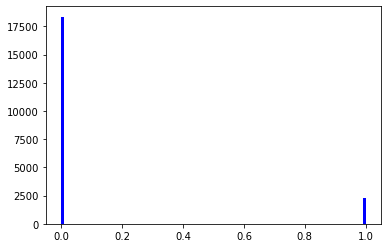


Distribution Curve : NEAR OCEAN



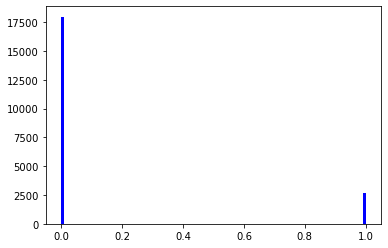

In [63]:
for column in home_data.columns:
    print(f"\nDistribution Curve : {column}\n")
    plt.hist(home_data[column], bins = 100,color='b')
    plt.show() 

#### Natural Log Transformation for Right Skewed Data

Throughout assessment of the feature data dispersions and distributions, it can be observed that several features display severely _Right-Skewed Curves_. Skewed data is an indicator that outliers could damage the data, which would ultimately lead to negatively affected performances, especially in regression-based learning algorithms. In an attempt to combat this, a numerical data transformation technique known as Log Transformation was applied to the relevant features. The ultimate aim of this was to combat the right-skewed distributions by bringing them closer to normal distributions individually.

The approach was considered on the basis of the feature data in question being right skewed, positive, i.e. greater than zero, and non-parametric. If any one of these three conditions were not to be met, performing Natural Log Transformation on the features could lead have potentially devastating effects on the integrity of the data.

The acutely right skewed features that were identified can be viewed below, in red histograms.


Right-Skewed Distribution for Feature : total_rooms



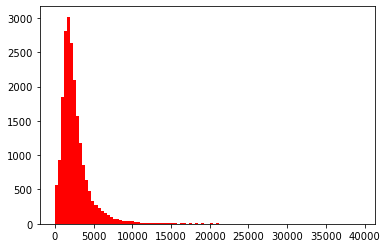


Right-Skewed Distribution for Feature : population



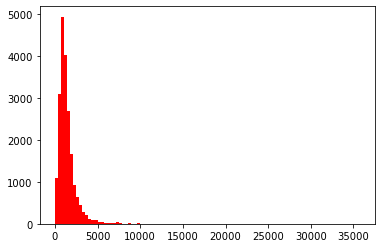


Right-Skewed Distribution for Feature : households



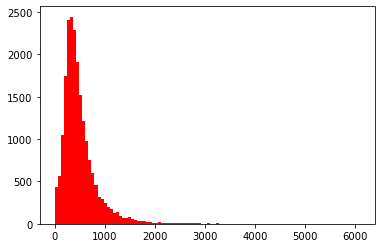


Right-Skewed Distribution for Feature : median_income



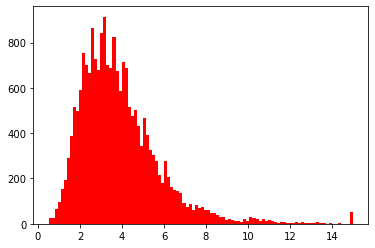

In [64]:
for column in ['total_rooms','population','households','median_income']:
    print(f"\nRight-Skewed Distribution for Feature : {column}\n")
    plt.hist(home_data[column], bins = 100,color='r')
    plt.show()   

Replace the appropriate features with it's Natural Log Transformed self:

In [65]:
# for column in ['total_rooms','population','households','median_income']:
#     home_data[column] =  np.log(home_data[column])

Then to display the effects of the transformation on the right skewed distributions:


Log Transformed Distribution for Feature : total_rooms



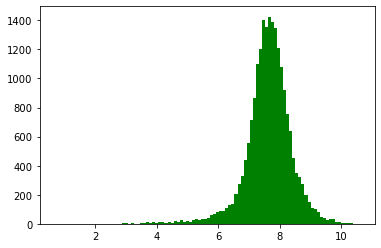


Log Transformed Distribution for Feature : population



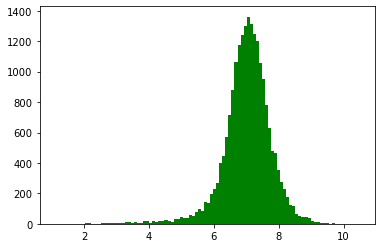


Log Transformed Distribution for Feature : households



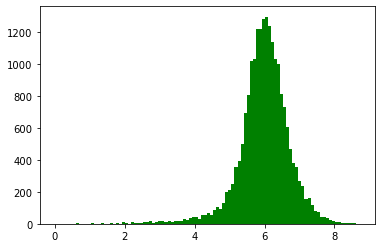


Log Transformed Distribution for Feature : median_income



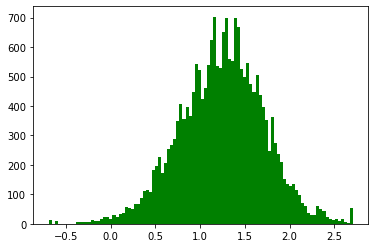

In [66]:
for column in ['total_rooms','population','households','median_income']:
    print(f"\nLog Transformed Distribution for Feature : {column}\n")
    plt.hist(np.log(home_data[column]), bins = 100,color='g')
    plt.show()  

As can be seen, the Natural Log successfully transformed the Right-Skewed Curved feature distributions into more symmetrically shaped Normal Distribution Curves. Note firstly that, the normalisation of the curve is ot to be confused with the normalisation or centering of the data, this will be done using Z-Score Normalization, which will take place in the individual model pipelines, by making use of the StandardScaler, more on that later. Secondly as stated above, Natural Log Transformation would _not_ work on features with left skewed distributions. For left-skewed data, one could opt for Square Transformation.

#### Square Transformation for Left-Skewed Distributions

Since the Natural Log Transformation Technique cannot be used on Left-Skewed Distributed data, another technique would need to be used. Enter the Square Transformation Technique. Unfortunately (or should it be fortunately), there are no cases of Left-Skewed Features in the provided dataset. 

However, for demonstrative purposes, let's assume that there were. In order to transform a right skewed feature one would simply have to raplace the feature's values with the square root of themselves, provided that all of them are positive, as you cannot square-root a negative number. The process is simple, and could be done like this:

Using Numpy:

In [67]:
# dataframe["left_squared_feature"] = np.sqrt(dataframe["left_squared_feature"])

Using plain Python:

In [68]:
# dataframe["left_squared_feature"] = sqrt(dataframe["left_squared_feature"])

Or going completely Analog:

In [69]:
# dataframe["left_squared_feature"] = dataframe["left_squared_feature"]**0.5

There are many ways to do this, but consistancy is one of the most important pillars in programming, and in any endeavour for that matter. Best practice would be to choose a specific method and to commit. Personally, I always use Numpy for this class of operations.

## Finally, pulling all the above strings together

#### Defining the Features & Labels

In [70]:
features = home_cleaned.drop(columns=["median_house_value"])
labels = home_cleaned["median_house_value"]

#### Splitting the data into Training & Testing Sets forn Linear Regression. Classification comes later.

In [71]:
x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(features, labels, train_size = 0.80)

 ## Explore many different models (at least 3) and shortlist the best ones [20] Bonus [5]

#### hint!
- Some with cross_validation
- Tree based models
- Non- Tree based Models
- (don't worry too much about tuning here) => we did worry (Werner, Zandrei : 2022/5/6 @ 22:09)

# Linear Models

## Multiple-Linear Regression

Regression models describe the link between variables by fitting a line to the observable data. A straight line is used in linear regression models, but a curved line is used in logistic and nonlinear regression models. You may use regression to estimate how a dependent variable changes when the independent variable(s) change (Bevans, 2020).

Multiple linear regression is used to evaluate the link between two or more independent variables and one dependent variable. You may use multiple linear regression to find out:
- The degree to which two or more independent variables are related to one dependent variable.
- The value of the dependent variable at a given independent variable value.

All of the assumptions in multiple linear regression are either the same as or derived from basic linear regression:
- Homogeneity of variance (homoscedasticity): the extent of the error in our prediction does not vary considerably among independent variable values.
- Observation independence: the observations in the dataset were acquired using statistically acceptable sampling techniques, and there are no hidden correlations between them.
- Normality: The data is distributed normally.
- The connection between the independent and dependent variables is linear: the straight line that best fits the data points (rather than a curve or a grouping factor).

The formula for a multiple linear regression is:

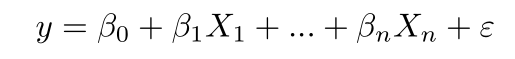


- y = the dependent variable's anticipated value.
- B0 represents the y-intercept (value of y when all other parameters are set to 0).
- B1X1 = the first independent variable's (X1) regression coefficient (B1) (a.k.a. the effect of raising the value of the independent variable on the projected y value).
- ... = repeat for as many independent variables as you are testing.
- BnXn = the final independent variable's regression coefficient.
- e represents model error (a.k.a. the degree of uncertainty in our estimate of y).

Multiple linear regression computes three things to obtain the best-fit line for each independent variable:
- The regression coefficients with the lowest total model error.
- The entire model's t-statistic.
- The corresponding p-value (how probable it is that the t-statistic happened by coincidence if the null hypothesis of no link between the independent and dependent variables is true).

The t-statistic and p-value are then computed for each regression coefficient in the model (Bevans, 2020)




In [72]:
m_liner = Pipeline([("scaler", StandardScaler()), ("m_liner", LinearRegression())]).fit(x_train_lin, y_train_lin)

#### Model Testing

In [73]:
# Getting Prediction
y_pred_lin = m_liner.predict(x_test_lin)


# Obtaining Metrics
print(f"R2 Score : {r2_score(y_test_lin,y_pred_lin)}")
print(f"Mean Squared Error : {mean_squared_error(y_test_lin, y_pred_lin)}")

R2 Score : 0.6063986866837531
Mean Squared Error : 5272627487.996393


#### Model Evaluation

Our R2 score indicates the (total variance explained by the model)/(total variance).

Because of the low feature relation in our dataset, we observe a low R2 score. A higher feature relation would ultimitely result in a better R2 score.

# Classification Models

#### Prepping the Labels for Binary Classification

In [74]:
labels_binary = labels.apply(lambda x: 1 if x >= np.median(labels) else 0)

#### Prepping the Labels for Multi-Label Classification

Obtaining Quartiles to use as Thresholds

In [75]:
q1 = np.percentile(home_data["median_house_value"], 25)
q2 = np.percentile(home_data["median_house_value"], 50)
q3 = np.percentile(home_data["median_house_value"], 75)

Creating Splitter

In [76]:
splitter = lambda value: 4 if value >= q3 else (3 if value >= q2 and value < q3 else (2 if value >= q1 and value < q2 else (1 if value < q1 else 0)))  

Applying Splitter to Labels

In [77]:
labels_multi = labels.apply(splitter)
print(labels_multi.value_counts())

3    5165
4    5160
2    5159
1    5156
Name: median_house_value, dtype: int64


#### Re-establishing Feature & Label Splits

Binary Labels

In [78]:
x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(features, labels_binary, train_size = 0.8)

Multi Labels

In [79]:
x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(features, labels_multi, train_size = 0.8)

## Logistic Regression

When the dependent variable is dichotomous(binary), logistic regression is the proper regression strategy to use. Like some other regression studies, logistic regression is a predictive analysis. Logistic regression is a statistical method for describing and explaining the connection between one dependent binary variable and one or more nominal, ordinal, interval, or ratio-level independent variables (Statistics Solutions, 2022).

Logistic regressions can be difficult to read at times. The Intellectus Statistics application makes it simple to do the analysis and then explains the results in plain English.

Assumptions that Logistic Regression make:

- The dependent variable should be binary in nature.
- Outliers in the data should be avoided, which may be determined by converting the continuous predictors to standardized scores and deleting values less than -3.29 or larger than 3.29.
- The predictors should not have large correlations (multicollinearity). To investigate this, a correlation matrix among the variables might be employed. The assumption is satisfied as long as the correlation coefficients between independent variables are less than 0.90.

The issue of predicting the log chances of an occurrence lies at the heart of the logistic regression analysis. Logistic regression mathematically estimates a multiple linear regression function defined as:

logit(p)

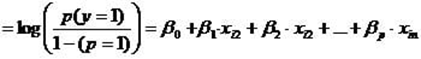





In [80]:
logger = Pipeline([("scaler", StandardScaler()), ("logger", LogisticRegression())]).fit(x_train_bin, y_train_bin)

#### Logistic Regression Testing

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2073
           1       0.80      0.82      0.81      2055

    accuracy                           0.81      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.81      0.81      0.81      4128

ROC AUC (Area Under Curve): 0.8098728525603782


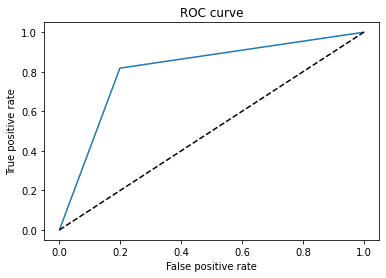

In [81]:
y_pred_logger = logger.predict(x_test_bin)
scoresheet(y_test_bin, y_pred_logger)

#### Obervations & Evaluation on Logistic Regression

The accuracy of our logistic regression model is in the range of 80%. From above it is clear that we have a high precision score, this indicate to us that our model is making correct predictions about 80% of the time. It can also be seen that our precision scores boost our accuracy.

It is also observed that our rate of true positives(recall score) averages around 80%, the recall score, together with the specificity score i.e. rate of true negatives, also contributes to our accuracy score.

The precision and recall determines the f1 score of the model, in the case of this model our f1 score is not perfect, but this is due to the nature of the dataset.

By looking at the ROC AUC we can observe that we have an high area, which also shows the direct correlation with the recall score. The shape of the curve indicates to us that our model is good with predicting true positives.

Overall this model performs acceptably.

## Decision Tree (Binary)

The Decision Tree makes use of Gini Impurity to calculate the Gain of each feature in order to select the best feature for decision splitting.

A decision tree is a decision-making tool with a tree-like structure that simulates likely outcomes, resource costs, utilities, and potential repercussions. Decision trees enable the presentation of algorithms with conditional control statements. They contain branches that indicate decision-making stages that can result in a positive outcome (Corporate Finance Institute, 2015 - 2022).

There are mainly 2 types of decision trees:

<b> Categorical variable decision tree:</b>
- Categorical target variables are grouped into categories in a categorical variable decision tree. For instance, the categories may be yes or no. The categories imply that every stage of the decision-making process falls into one of them, with no in-betweens (Kurama, 2020).

<b>Continuous variable decision tree:</b>
- A continuous variable decision tree is one that has a continuous goal variable. For example, depending on existing information such as their employment, age, and other continuous variables, the income of an individual whose income is unknown may be projected (Kurama, 2020).

The quantity of information obtained by an attribute is represented by Information Gain. It indicates the significance of the trait. Because Decision Tree building is all about finding the best split node to ensure high accuracy, Information Gain is all about finding the best nodes to yield the maximum information gain. This is calculated using the Entropy factor. The degree of disarray in a system is defined by entropy. The more the disorder, the greater the entropy. When the sample is completely homogenous, the entropy is zero, and when the sample is somewhat structured, say 50%, the entropy is one (Kurama, 2020).


#### Buidling & Training a Decision Tree for Binary Classification

In [82]:
dessy = Pipeline([("scaler", StandardScaler()), ("dessy", DecisionTreeClassifier())]).fit(x_train_bin, y_train_bin)

#### Decision Tree (Binary) Testing

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      2073
           1       0.80      0.80      0.80      2055

    accuracy                           0.80      4128
   macro avg       0.80      0.80      0.80      4128
weighted avg       0.80      0.80      0.80      4128

ROC AUC (Area Under Curve): 0.8023070341301615


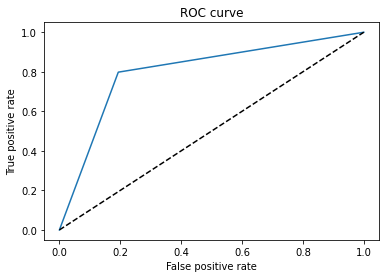

In [83]:
y_pred_dessy = dessy.predict(x_test_bin)

scoresheet(y_test_bin, y_pred_dessy)

#### Obervations & Evaluation on Decision Tree (Binary)

Our scores for our decision tree model are very similar to our logistic regression model. There is however a variation in our recall scores. The other scores stay relatively consistent. Our ROC AUC for the decision tree model is also very similiar to our logistic regression model.

## Random Forest (Binary)

Random forest classification is a supervised machine learning algorithm that is generally applied to classification and regression problems. (R, 2021)

The Random Forest Algorithm basically makes use of multiple decision trees. The difference however, is that instead of using the Gini Impurity to calculate gain in order to select features for decision splitting, this algorithm selects random subsets of features for decision splitting, after which they are replaced into the training set and new subsets are selected. This is also refered to as bagging. At the end of the day, the Random Forest uses multiple trees, and democratically selects the most popular classification result from it's trees as it's final prediction.

The random forest classification algorithm has the following important features:
- It can work with a dataset that contains continuous variables, in the case of regression
- It also works with a dataset that has categorical variables, in the case of classification

The random forest algorithm uses a collection of algorithms as opposed to a single algorithm, to make predictions. This is what we refer to as ensemble.

Ensemble uses two types of methods:

Bagging – The bagging technique makes use of two datasets. The first dataset is a subset of data that is derived from the sample training data by making use of replacement techniques where the final output is based on the majority vote.

Boosting –  Boosting acts as a combination of weak data and strong data by creating models that work in a sequence to ultimately create a model that has a very high accuracy.

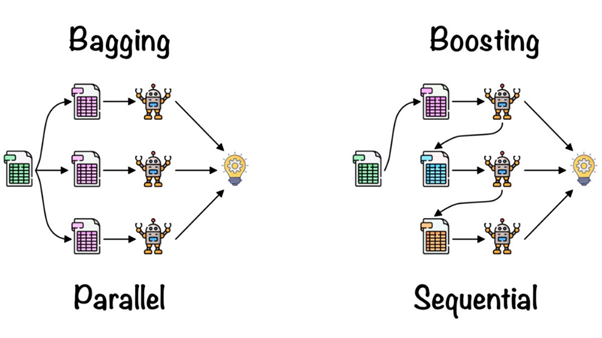

Steps involved in the random forest classification algorithm:

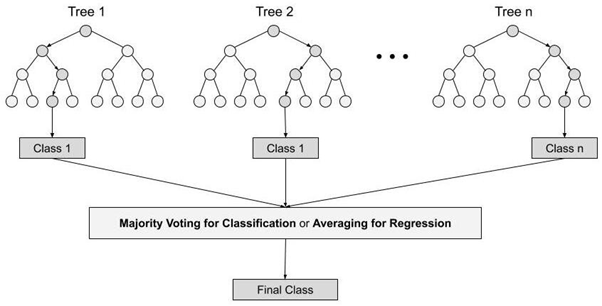

- The random forest classification model uses n number of records out of a dataset that has k number of records.
- The algorithm then continues to construct various decision trees from each of these samples
- Each one of these decision trees will then generate an output
- The final output will then be chosen, based on the majority voting for classification or by making use of averaging for regression respectively.





#### Building & Training the Random Forest using Binary Labels

In [84]:
rando = Pipeline([("scaler", StandardScaler()), ("rando", RandomForestClassifier(100))]).fit(x_train_bin, y_train_bin)

#### Random Forest (Binary) Testing

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2073
           1       0.85      0.85      0.85      2055

    accuracy                           0.85      4128
   macro avg       0.85      0.85      0.85      4128
weighted avg       0.85      0.85      0.85      4128

ROC AUC (Area Under Curve): 0.8519867887789128


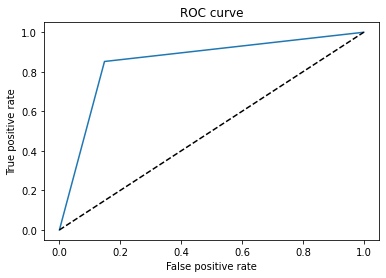

In [85]:
y_pred_rando_bin = rando.predict(x_test_bin)
scoresheet(y_test_bin, y_pred_rando_bin)

#### Obervations & Evaluation on Random Forest (Binary)

From above we can observe a much higher accuracy as compared to the decision tree model and the logistic regression model.

We can also observe that the model has a higher precision which tells us that the model is better at predicting outcomes correctly in a controlled manner. The high accuracy tells us that the model guesses correctly.

## Perceptron

Perceptron is a Machine Learning technique that is used for supervised learning of binary classification tasks. Furthermore, a perceptron is defined as an Artificial Neuron or neural network unit that aids in the detection of certain input data calculations in business intelligence (JavaTpoint, 2011-2021).

One of the best and simplest forms of Artificial Neural Networks is the perceptron model. It is, however, a supervised learning technique based on binary classifiers. As a result, we may think of it as a single-layer neural network with four primary parameters: input values, weights and bias, net sum, and an activation function.

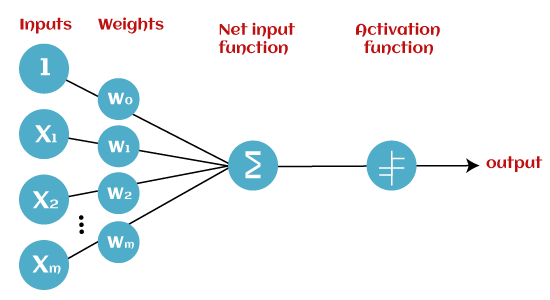

<b>Input nodes or input layer:</b>
- The fundamental component of Perceptron that admits initial data into the system for processing. Each input node has a true numerical value.

<b>Weight and bias</b>
- The weight parameter reflects the strength of the link between units. This is another critical parameter of Perceptron components. In determining the output, weight is exactly proportional to the strength of the linked input neuron. Bias may also be thought of as the line of intercept in a linear equation.

<b>Activation function</b>
- These are the last and most essential components that decide whether or not the neuron will fire. The Activation Function is best thought of as a step function.

<b>Types of activation functions:</b>
- Sign function
- Step function, and
- Sigmoid function

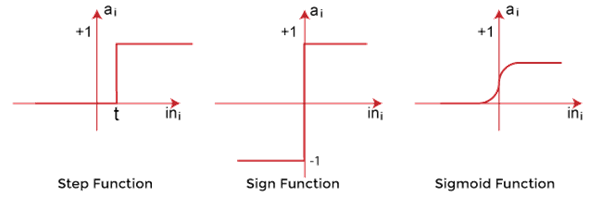

The perceptron model starts by multiplying all input values and their weights, then sums these values to produce the weighted sum. The weighted sum is then applied to the activation function 'f' to get the desired result (JavaTpoint, 2011-2021). 




#### Building & Training a Perceptron

In [86]:
perco = Pipeline([("scaler", StandardScaler()), ("perco", Perceptron())]).fit(x_train_bin, y_train_bin)

#### Perceptron Testing

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      2073
           1       0.75      0.77      0.76      2055

    accuracy                           0.76      4128
   macro avg       0.76      0.76      0.76      4128
weighted avg       0.76      0.76      0.76      4128

ROC AUC (Area Under Curve): 0.7556462829356234


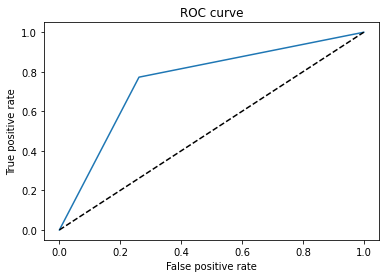

None


In [87]:
y_pred_perco = perco.predict(x_test_bin)

print(scoresheet(y_test_bin, y_pred_perco))

#### Obervations & Evaluation on Perceptron

From above it is clear that our perceptron model performs worse than the other classification models. This observation was made from the lower accuracy scores, as well as the lower precision scores.

By looking at the ROC AUC we can observe that our ratio between true positive predictions and false positive predictions are lower as compared to our other classification models.

## K-Nearest Neighbours

The K-Nearest Neighbours algorithm is a distance based classification algorithm that assesses a data point’s distance to other points in a multidimensional space, in order to predict which category best represents that given datapoint. It is similar to K-Means clustering in the sense that both algorithms follow the same approach up to a point. Both Algorithms make use of the Euclidean distance formula to calculate the distance between points, but that is where the similarities end.

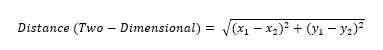

Note that the above formula, i.e. the Euclidean Distance Formula, as it is written there, is for two dimensional data, i.e. one X (feature) and a label. However, it can also be reapplied for multi-dimensional datasets, i.e. where two or more features are present. This is especially useful in real-life applications where such datasets are common. Adapting the formula is rather simple, and merely involves chaining the dimensions, to the n^th dimension of the feature set, as demonstrated below.

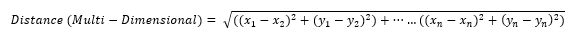

In the K-Nearest Neighbours algorithm, one needs to specify how many nearby, or neighbouring points to reference when calculating which classification, or label to ascribe to a datapoint, or record in question, with the specified k-variable. One needs to pay careful attention to the magnitude of that k-variable. If it’s too low, one could run the risk of over-fitting, where the decision line is too sensitive to the surrounding data. If it’s set too high, on the other hand, one could then run the risk of underfitting, where the model’s decision line is too insensitive to the surrounding data.
Unlike its clustering counterpart, the K-Nearest Neighbours Algorithm requires labelled data to make its prediction. What this essentially means is that the potential groupings or categories, if you will, are predefined by a label set that accompanies the input dataset. Whereas K-Means clustering finds order in unlabelled chaos. 

#### Building & Training a KNN Model for Binary Classification

In [88]:
kanna = Pipeline([("scaler", StandardScaler()), ("kanna", KNeighborsClassifier(n_neighbors=5))]).fit(x_train_bin, y_train_bin)

#### KNN Testing on Binary Classification

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2073
           1       0.82      0.82      0.82      2055

    accuracy                           0.82      4128
   macro avg       0.82      0.82      0.82      4128
weighted avg       0.82      0.82      0.82      4128

ROC AUC (Area Under Curve): 0.8214566145893852


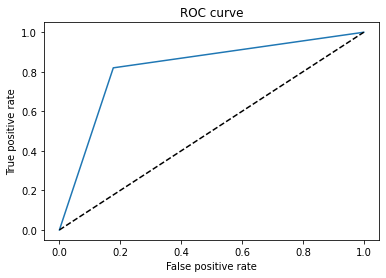

In [89]:
y_pred_kanna = kanna.predict(x_test_bin)

scoresheet(y_test_bin, y_pred_kanna)

#### Obervations & Evaluation on KNN

From above we can observe a high precision score as well as a high accuracy, which tells us that the KNN model performs well. Our high ROC AUC also proves that this model performs consistently.

## Decision Tree (Multi-Label)

#### Building & Training Decision Tree for Multi-Label Classification

In [90]:
dessy_multi = Pipeline([("scaler", StandardScaler()), ("dessy", DecisionTreeClassifier())]).fit(x_train_multi, y_train_multi)

#### Testing the Decision Tree on Multi-Label Classification

In [91]:
y_pred_dessy_multi = dessy_multi.predict(x_test_multi)

scoresheet(y_test_multi, y_pred_dessy_multi)

              precision    recall  f1-score   support

           1       0.74      0.75      0.75      1032
           2       0.48      0.48      0.48       971
           3       0.52      0.51      0.51      1094
           4       0.67      0.68      0.67      1031

    accuracy                           0.60      4128
   macro avg       0.60      0.60      0.60      4128
weighted avg       0.60      0.60      0.60      4128



## Random Forest (Multi-Label)

#### Building & Training Random Forest Model for Multi-Label Classification

In [92]:
rando_multi = Pipeline([("scaler", StandardScaler()), ("dessy", RandomForestClassifier())]).fit(x_train_multi, y_train_multi)

#### Testing the Random Forest Model on Multi-Label Classification

In [93]:
y_pred_rando_multi = rando_multi.predict(x_test_multi)

scoresheet(y_test_multi, y_pred_rando_multi)

              precision    recall  f1-score   support

           1       0.77      0.84      0.80      1032
           2       0.56      0.56      0.56       971
           3       0.60      0.58      0.59      1094
           4       0.76      0.72      0.74      1031

    accuracy                           0.68      4128
   macro avg       0.67      0.68      0.67      4128
weighted avg       0.67      0.68      0.67      4128



## K-Nearest Neighbours (Multi-Label)

#### Building & Training K-Nearest Neighbours Model for Multi-Label Classification

In [94]:
kanna_multi = Pipeline([("scaler", StandardScaler()), ("dessy",  KNeighborsClassifier(n_neighbors=5))]).fit(x_train_multi, y_train_multi)

#### Testing the K-Nearest Neighbours Model on Multi-Label Classification

In [95]:
y_pred_kanna_multi = kanna_multi.predict(x_test_multi)

scoresheet(y_test_multi, y_pred_kanna_multi)

              precision    recall  f1-score   support

           1       0.72      0.79      0.75      1032
           2       0.45      0.54      0.49       971
           3       0.53      0.46      0.49      1094
           4       0.74      0.62      0.68      1031

    accuracy                           0.60      4128
   macro avg       0.61      0.60      0.60      4128
weighted avg       0.61      0.60      0.60      4128



#### Evaluation of our multi-label classification models

From the above scoresheets it is clear that our multi-label classification models are struggling to predict values that are between the minimum and maximum of our data. This could be becuase the data is too close to each other in this range and the models cannot decide between the two classification groups to make an accurate prediction.

The above statement is true for all 3 of our multi-label classification models

# Stratified K-Fold Cross Validation

Cross validation is a technique for evaluating a machine learning model and testing its performance. 
Cross validation ultimately helps to compare and select an appropriate model for the specific task at hand (Lyashenko & Jha, 2022)

There are a bunch of different techniques that can be used to apply cross validation however all of these techniques follow similar steps:

- Split the dataset into 2 parts: one for training, other for testing
- Do the training of the model on the train set
- Do the validation on the test set
- Repeat 1-3 steps a few times. This number depends on the cross- validation method that you are using.


We will be using stratified k-fold cross validation in this project.

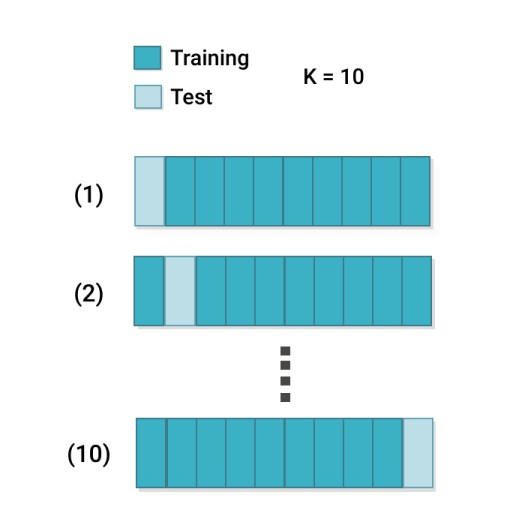

The stratified k-fold algorithm works as follows, as stipulated by Lyashenko & Jha (2022):

1.	Decide on a number of folds -k 
2.	Transform the dataset into k different folds. Each fold must contain approximately the same percentage of samples of each target class as the complete set. 
3.	Decide on k – 1 folds which will act as the training set. The remaining fold will ultimitely be the test set
4.	Do the training of the model on the training sit. On each iteration a new model must be trained.
5.	Validate the model by using the test set.
6.	Save the result of the validation.
7.	Repeat steps 3 – 6 k times. Each time use the remaining  fold as the test set. In the end, you should have validated the model on every fold that you have.
8.	To get the final score, calculate an average of the results that you got on step 6.

It is very important to note that the model does not always perform badly simply because you are using stratified-k-fold cross validation to validate the model which was trained on a dataset with a class imbalance. To avoid this you should always make sure to do a proper EDA.

#### Getting all of the Models in one place        ;)

In [96]:
linear_models = {"Linear Regression": m_liner}
classifiers_binary = {"Logistic Regression": logger, "Decision Tree (Binary)": dessy, "Random Forest (Binary)": rando, "Perceptron": perco, "KNN": kanna}
classifiers_multi = {"Decision Tree (Multi-Labels)": dessy_multi, "Random Forest (Multi-Labels)": rando_multi, "KNN (Multi-Label)": kanna_multi}

#### Call the Cross Validate Function (Bottom of Script)



Test Fold 1


Fold 1 : Logistic Regression

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      2063
           1       0.75      0.79      0.77      2065

    accuracy                           0.76      4128
   macro avg       0.76      0.76      0.76      4128
weighted avg       0.76      0.76      0.76      4128

ROC AUC (Area Under Curve): 0.7606457132998208


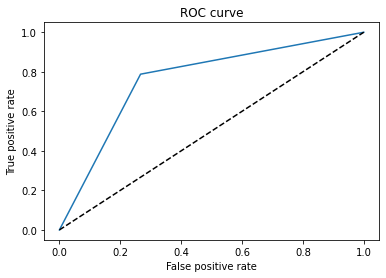


Fold 1 : Decision Tree (Binary)

              precision    recall  f1-score   support

           0       0.72      0.63      0.67      2063
           1       0.67      0.76      0.71      2065

    accuracy                           0.69      4128
   macro avg       0.69      0.69      0.69      4128
weighted avg       0.69      0.69      0.69      4128

ROC AUC (Area Under Curve): 0.6908601803480907


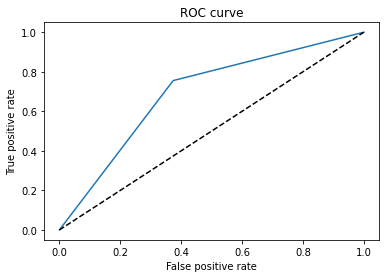


Fold 1 : Random Forest (Binary)

              precision    recall  f1-score   support

           0       0.77      0.69      0.72      2063
           1       0.72      0.79      0.75      2065

    accuracy                           0.74      4128
   macro avg       0.74      0.74      0.74      4128
weighted avg       0.74      0.74      0.74      4128

ROC AUC (Area Under Curve): 0.738347384271947


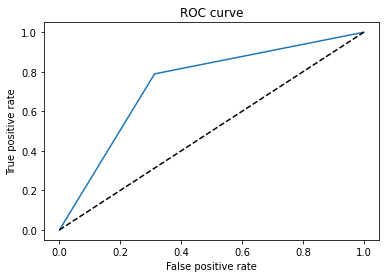


Fold 1 : Perceptron

              precision    recall  f1-score   support

           0       0.73      0.51      0.60      2063
           1       0.62      0.81      0.70      2065

    accuracy                           0.66      4128
   macro avg       0.68      0.66      0.65      4128
weighted avg       0.68      0.66      0.65      4128

ROC AUC (Area Under Curve): 0.6605398471160854


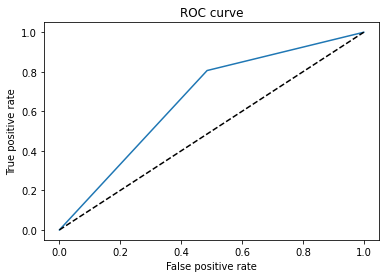


Fold 1 : KNN

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2063
           1       0.75      0.75      0.75      2065

    accuracy                           0.75      4128
   macro avg       0.75      0.75      0.75      4128
weighted avg       0.75      0.75      0.75      4128

ROC AUC (Area Under Curve): 0.7490323572596386


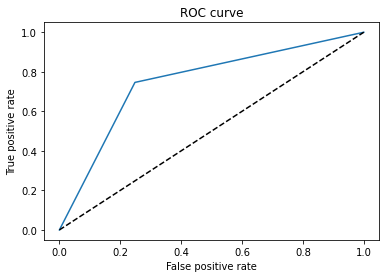



Test Fold 2


Fold 2 : Logistic Regression

              precision    recall  f1-score   support

           0       0.78      0.68      0.73      2063
           1       0.72      0.81      0.76      2065

    accuracy                           0.75      4128
   macro avg       0.75      0.75      0.74      4128
weighted avg       0.75      0.75      0.74      4128

ROC AUC (Area Under Curve): 0.7453665939374591


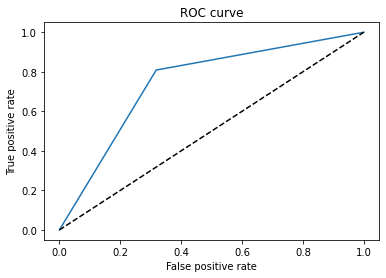


Fold 2 : Decision Tree (Binary)

              precision    recall  f1-score   support

           0       0.63      0.48      0.55      2063
           1       0.58      0.72      0.65      2065

    accuracy                           0.60      4128
   macro avg       0.61      0.60      0.60      4128
weighted avg       0.61      0.60      0.60      4128

ROC AUC (Area Under Curve): 0.6021696699252013


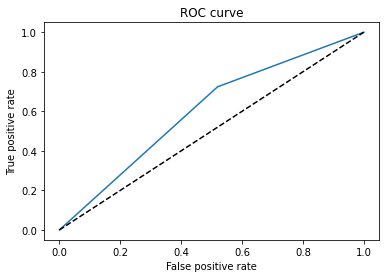


Fold 2 : Random Forest (Binary)

              precision    recall  f1-score   support

           0       0.63      0.48      0.55      2063
           1       0.58      0.72      0.64      2065

    accuracy                           0.60      4128
   macro avg       0.61      0.60      0.60      4128
weighted avg       0.61      0.60      0.60      4128

ROC AUC (Area Under Curve): 0.6014442166195825


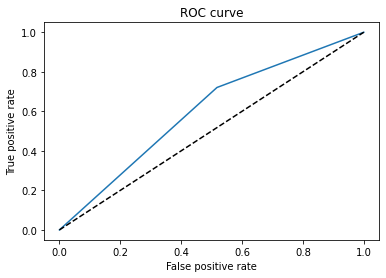


Fold 2 : Perceptron

              precision    recall  f1-score   support

           0       0.57      1.00      0.73      2063
           1       0.99      0.25      0.40      2065

    accuracy                           0.62      4128
   macro avg       0.78      0.62      0.56      4128
weighted avg       0.78      0.62      0.56      4128

ROC AUC (Area Under Curve): 0.6232438478484634


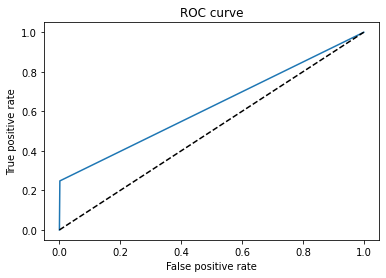


Fold 2 : KNN

              precision    recall  f1-score   support

           0       0.64      0.47      0.54      2063
           1       0.58      0.73      0.65      2065

    accuracy                           0.60      4128
   macro avg       0.61      0.60      0.60      4128
weighted avg       0.61      0.60      0.60      4128

ROC AUC (Area Under Curve): 0.6026511145878202


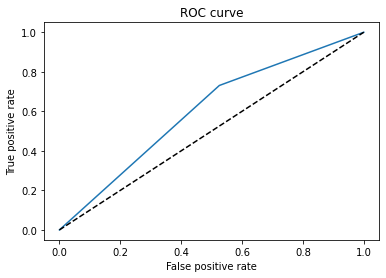



Test Fold 3


Fold 3 : Logistic Regression

              precision    recall  f1-score   support

           0       0.87      0.75      0.80      2063
           1       0.78      0.88      0.83      2065

    accuracy                           0.81      4128
   macro avg       0.82      0.81      0.81      4128
weighted avg       0.82      0.81      0.81      4128

ROC AUC (Area Under Curve): 0.8146465043619919


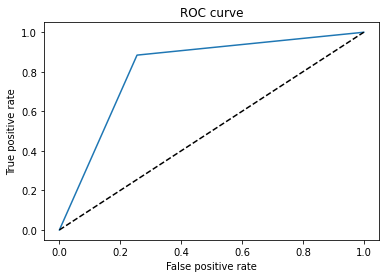


Fold 3 : Decision Tree (Binary)

              precision    recall  f1-score   support

           0       0.79      0.51      0.62      2063
           1       0.64      0.87      0.74      2065

    accuracy                           0.69      4128
   macro avg       0.72      0.69      0.68      4128
weighted avg       0.72      0.69      0.68      4128

ROC AUC (Area Under Curve): 0.6898369637296821


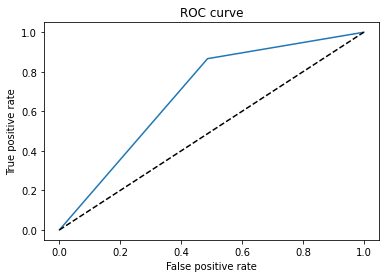


Fold 3 : Random Forest (Binary)

              precision    recall  f1-score   support

           0       0.86      0.64      0.73      2063
           1       0.71      0.90      0.79      2065

    accuracy                           0.77      4128
   macro avg       0.79      0.77      0.76      4128
weighted avg       0.79      0.77      0.76      4128

ROC AUC (Area Under Curve): 0.7673786617434588


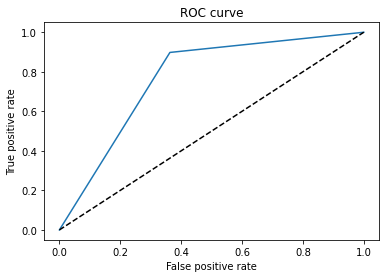


Fold 3 : Perceptron

              precision    recall  f1-score   support

           0       0.82      0.45      0.58      2063
           1       0.62      0.90      0.73      2065

    accuracy                           0.67      4128
   macro avg       0.72      0.67      0.66      4128
weighted avg       0.72      0.67      0.66      4128

ROC AUC (Area Under Curve): 0.6743093757298839


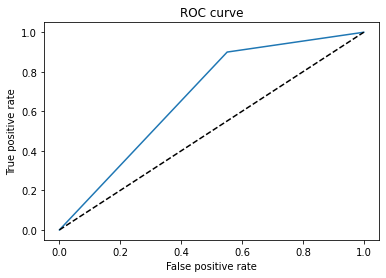


Fold 3 : KNN

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      2063
           1       0.73      0.89      0.80      2065

    accuracy                           0.78      4128
   macro avg       0.79      0.78      0.78      4128
weighted avg       0.79      0.78      0.78      4128

ROC AUC (Area Under Curve): 0.7821685901370744


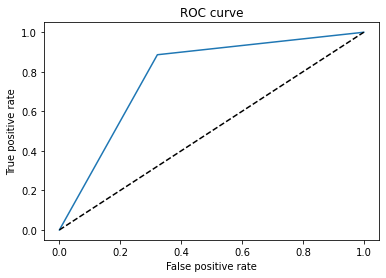



Test Fold 4


Fold 4 : Logistic Regression

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      2063
           1       0.75      0.78      0.77      2065

    accuracy                           0.76      4128
   macro avg       0.76      0.76      0.76      4128
weighted avg       0.76      0.76      0.76      4128

ROC AUC (Area Under Curve): 0.7623441496022976


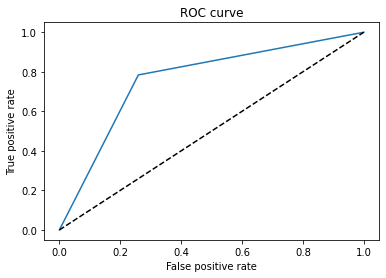


Fold 4 : Decision Tree (Binary)

              precision    recall  f1-score   support

           0       0.61      0.84      0.70      2063
           1       0.74      0.46      0.57      2065

    accuracy                           0.65      4128
   macro avg       0.67      0.65      0.64      4128
weighted avg       0.67      0.65      0.64      4128

ROC AUC (Area Under Curve): 0.649316505852569


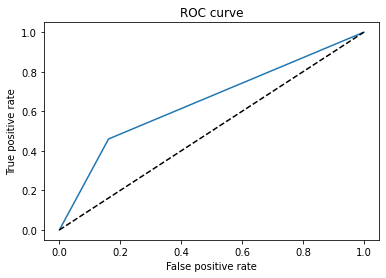


Fold 4 : Random Forest (Binary)

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      2063
           1       0.77      0.62      0.69      2065

    accuracy                           0.72      4128
   macro avg       0.72      0.72      0.71      4128
weighted avg       0.72      0.72      0.71      4128

ROC AUC (Area Under Curve): 0.7151626900339076


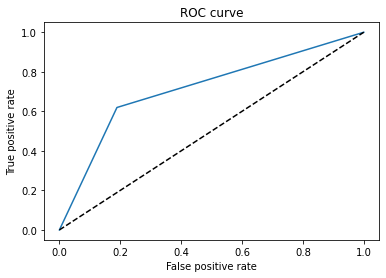


Fold 4 : Perceptron

              precision    recall  f1-score   support

           0       0.77      0.57      0.66      2063
           1       0.66      0.83      0.74      2065

    accuracy                           0.70      4128
   macro avg       0.72      0.70      0.70      4128
weighted avg       0.72      0.70      0.70      4128

ROC AUC (Area Under Curve): 0.7022149740792165


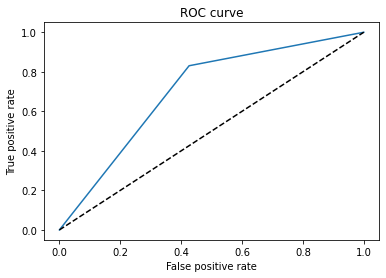


Fold 4 : KNN

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      2063
           1       0.77      0.73      0.75      2065

    accuracy                           0.76      4128
   macro avg       0.76      0.76      0.76      4128
weighted avg       0.76      0.76      0.76      4128

ROC AUC (Area Under Curve): 0.7577638526840362


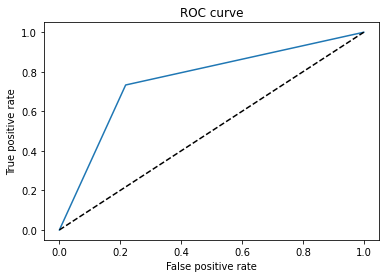



Test Fold 5


Fold 5 : Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2063
           1       0.85      0.85      0.85      2065

    accuracy                           0.85      4128
   macro avg       0.85      0.85      0.85      4128
weighted avg       0.85      0.85      0.85      4128

ROC AUC (Area Under Curve): 0.8469001278140511


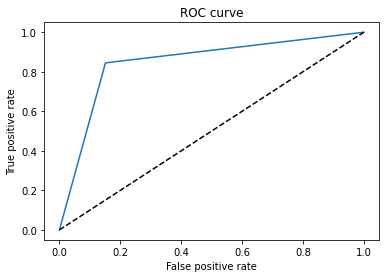


Fold 5 : Decision Tree (Binary)

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      2063
           1       0.75      0.85      0.79      2065

    accuracy                           0.78      4128
   macro avg       0.79      0.78      0.78      4128
weighted avg       0.79      0.78      0.78      4128

ROC AUC (Area Under Curve): 0.7800051407304297


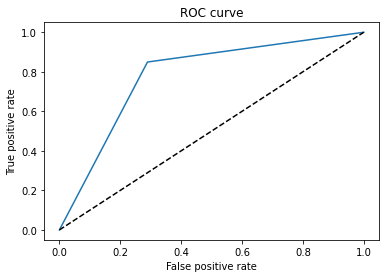


Fold 5 : Random Forest (Binary)

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2063
           1       0.83      0.85      0.84      2065

    accuracy                           0.84      4128
   macro avg       0.84      0.84      0.84      4128
weighted avg       0.84      0.84      0.84      4128

ROC AUC (Area Under Curve): 0.8355058983426427


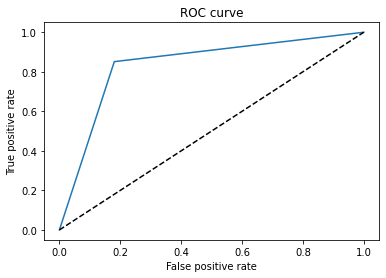


Fold 5 : Perceptron

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      2063
           1       0.77      0.74      0.75      2065

    accuracy                           0.76      4128
   macro avg       0.76      0.76      0.76      4128
weighted avg       0.76      0.76      0.76      4128

ROC AUC (Area Under Curve): 0.7587304977940632


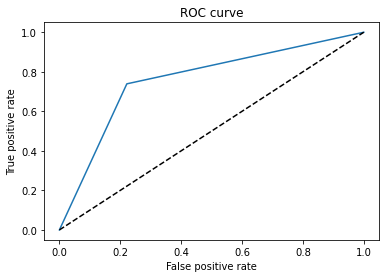


Fold 5 : KNN

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      2063
           1       0.82      0.85      0.83      2065

    accuracy                           0.83      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.83      0.83      0.83      4128

ROC AUC (Area Under Curve): 0.8279944461332435


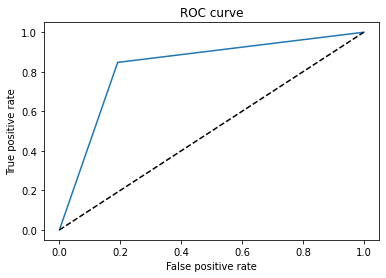

In [97]:
KFold_Cross_Validate(classifiers_binary, features, labels_binary)


#### Evaluate & Report on Cross Validation

The differences in the various folds of the K-Fold-Cross validation shows us that our data has various subsets which leads to inconsistencies in our predictions.

 ## Fine-tune your models [10] BONUS [10]

#### hint!
- We manually tuned our model in the class (this is not efficient)

try:
- GridSearchCV from sklearn (self-improvement)
- esemble methods
- evaluate your models on the test set

# Implementing GridSearchCV

It is the process of fine-tuning hyperparameters to find the best values for a particular model. The value of hyperparameters has a substantial impact on model performance. Because there is no method to predict the optimum values for hyperparameters, we must preferably attempt all possible values to determine the optimal values. Because doing this manually might take a significant amount of time and resources, we utilize GridSearchCV to automate hyperparameter tuning (rahul105, 2021).

GridSearchCV is a function in Scikit-learn's (SK- learn's) model selection package. It is vital to remember that the Scikit-learn library must be installed on the computer. This function assists you in looping over specified hyperparameters and fitting your estimator (model) to your training set. Finally, we may choose the optimal parameters from the list of hyperparameters (Great Learning Team, 2020).

As previously stated, we input predetermined hyperparameter values to the GridSearchCV method. We do this by constructing a dictionary in which we mention a certain hyperparameter as well as the values it can take. GridSearchCV examines the model for each combination of the values supplied in the dictionary using the Cross-Validation technique. As a result of utilizing this function, we can calculate the accuracy/loss for each combination of hyperparameters and select the one with the greatest performance (Great Learning Team, 2020).

## Linear Models

#### Set the Parameters for Linear Regression Test

In [98]:
linear_parameters = {'fit_intercept':[True, False], 'copy_X':[True, False]}

#### Build, Prime & Fit GridSearchCV

In [99]:
linear_grid = GridSearchCV(LinearRegression(), linear_parameters).fit(x_train_lin, y_train_lin)

#### Let's Print & Evaluate the Results

In [100]:
print(f"Best r2 Score : {linear_grid.best_score_}" )
print(f"Best Mean Squared Error : {np.mean((linear_grid.predict(x_test_lin) - y_test_lin) ** 2)}")

Best r2 Score : 0.6023947525859592
Best Mean Squared Error : 5272627487.996413


### Observations for Linear Regression with GridSearchCV:

As the r2 score of the GridSearchCV correlates with the r2 score without implementing grid search. The conclusion can be made given the data we had to work with, we did our EDA analysis correctly. If these scores differed it would indicate to us that we need to adjust our EDA and parameters.

We experimented with the parameters for the linear regression model specifically and we have made the conclusion that we did our EDA correctly and that changing the parameters of our model won't have much effect on the performance of our model.

## Binary Classification Models

#### Create the Dictionary that holds all of the Models, Names & Parameters

In [101]:
binary_model_parameters = {
    LogisticRegression(): ["Logistic Regression", {}],
    DecisionTreeClassifier(): ["Decision Tree (Binary)", {}],
    RandomForestClassifier(): ["Random Forest Classifier (Binary)", {}],
    Perceptron(): ["Perceptron", {}],
    KNeighborsClassifier(): ["K-Nearest Neighbours (Binary)", {}]
}

#### Build & Run GridSearchCV for all Binary Classifiers



Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2073
           1       0.80      0.82      0.81      2055

    accuracy                           0.81      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.81      0.81      0.81      4128

ROC AUC (Area Under Curve): 0.8089038418878807


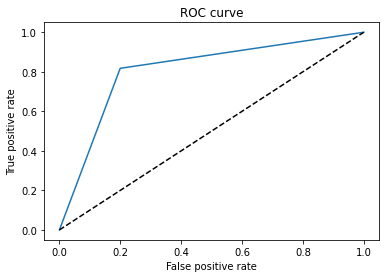



Decision Tree (Binary)
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      2073
           1       0.78      0.78      0.78      2055

    accuracy                           0.78      4128
   macro avg       0.78      0.78      0.78      4128
weighted avg       0.78      0.78      0.78      4128

ROC AUC (Area Under Curve): 0.7839063946957934


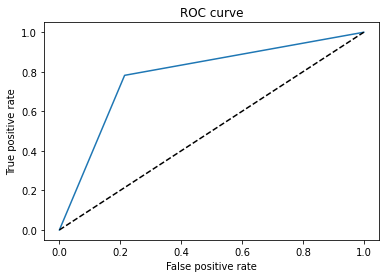



Random Forest Classifier (Binary)
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2073
           1       0.83      0.85      0.84      2055

    accuracy                           0.84      4128
   macro avg       0.84      0.84      0.84      4128
weighted avg       0.84      0.84      0.84      4128

ROC AUC (Area Under Curve): 0.8404157027616099


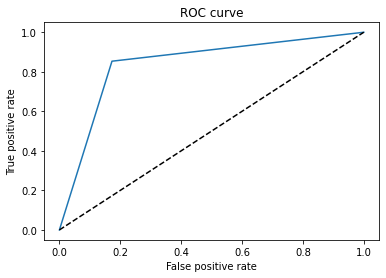



Perceptron
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      2073
           1       0.74      0.78      0.76      2055

    accuracy                           0.75      4128
   macro avg       0.76      0.75      0.75      4128
weighted avg       0.76      0.75      0.75      4128

ROC AUC (Area Under Curve): 0.7549395952831152


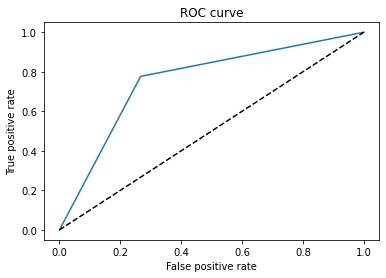



K-Nearest Neighbours (Binary)
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2073
           1       0.82      0.82      0.82      2055

    accuracy                           0.82      4128
   macro avg       0.82      0.82      0.82      4128
weighted avg       0.82      0.82      0.82      4128

ROC AUC (Area Under Curve): 0.821223868930039


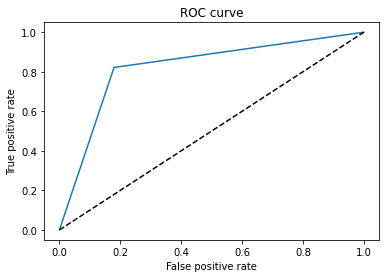

In [102]:
generate_GridSearchCV_class(binary_model_parameters, x_train_bin, x_test_bin, y_train_bin, y_test_bin)

#### Obervations & Evaluation

All of our models, but the perceptron model, perform well when a binary classification for the label is used.

Our best performing binary classification model is the random forest classifier, this can be seen by analysing the total area under the ROC curve (ROC AUC) which is clearly the highest between all of the binary classification models.

This observation also correlates to with what we saw from our individual observations and correlations.

## Multi-Label Classification Models

#### Create the Dictionary that holds all of the Models, Names & Parameters

In [103]:
multi_model_parameters = {
    DecisionTreeClassifier(): ["Decision Tree (Multi-Label)", {}],
    RandomForestClassifier(): ["Random Forest Classifier (Multi-Label)", {}],
    KNeighborsClassifier(): ["K-Nearest Neighbours (Multi-Label)", {}]
}

#### Build & Run GridSearchCV for all Multi-Label Classifiers

In [104]:
generate_GridSearchCV_class(multi_model_parameters, x_train_multi, x_test_multi, y_train_multi, y_test_multi)



Decision Tree (Multi-Label)
              precision    recall  f1-score   support

           1       0.71      0.73      0.72      1032
           2       0.42      0.40      0.41       971
           3       0.46      0.45      0.45      1094
           4       0.62      0.64      0.63      1031

    accuracy                           0.56      4128
   macro avg       0.55      0.56      0.55      4128
weighted avg       0.55      0.56      0.55      4128



Random Forest Classifier (Multi-Label)
              precision    recall  f1-score   support

           1       0.75      0.82      0.79      1032
           2       0.51      0.52      0.52       971
           3       0.55      0.54      0.55      1094
           4       0.73      0.67      0.70      1031

    accuracy                           0.64      4128
   macro avg       0.64      0.64      0.64      4128
weighted avg       0.64      0.64      0.64      4128



K-Nearest Neighbours (Multi-Label)
              precisio

#### Obervations & Evaluation

Our multi-label classification models has performed significantly worse than their binary classifier counterparts, a clear observation that was made is the low f1 scores that occurs in classification groups 2 and 3 in our label set.

Our best performing multi-label classification model is the random forest classifier.

## Present your solution [20].

#### hint!
- you do not need machine learning knowledge to write a report
- Report your choosen solution and justify it

# Report on the Journey to our Final Solution
This report will comment on the following relevant topics that are present in this project:
- Linear models vs classification models
- Performance comparison of binary classifiers
- Performance comparison of multi-label classifiers
- The best performing classification model


# Linear Models vs Classification Models:
<b>Linear models:</b>

A regression algorithm may predict a discrete value, but the discrete value in the form of an integer quantity

<b>Classification models:</b>

A classification algorithm may predict a continuous value, but the continuous value is in the form of a probability for a class label.

We have analysed the performance of a multi-linear regression model and compared it to the performance of various classification models such as: logistic regression, decision tree, random forest classification, perceptron and k-nearest neighbour.

## Individual observations of our classification models:

### Binary Classifiers:
- <b>Logistic Regression</b>

The main observation from this model was that our rate of true positives(recall score) averages around 80%, the recall score, together with the specificity score i.e. rate of true negatives, also contributes to our accuracy score.

The precision and recall determines the f1 score of the model, in the case of this model our f1 score is not perfect, but this is due to the nature of the dataset.

- <b>Decision Tree</b>

Our scores for our decision tree model are very similar to our logistic regression model. There is however a variation in our recall scores. The other scores stay relatively consistent. Our ROC AUC has a similar nature to our logistical regression model.


- <b>Random Forest Classifier</b>

In our random forest classifier we observed a much higher accuracy as compared to the decision tree model and the logistic regression model.

We also observed that the model has a higher precision which tells us that the model is better at predicting outcomes correctly in a controlled manner. The high accuracy tells us that the model guesses correctly.

- <b>Perceptron</b>

It was observed that our perceptron model performs worse than the other classification models. This observation was made from the lower accuracy scores, as well as the lower precision scores.

By looking at the ROC AUC we observed that our ratio between true positive predictions and false positive predictions are lower as compared to our other classification models.


- <b>K-Nearest Neighbours</b>

We have observed a high precision score as well as a high accuracy score, which tells us that the KNN model has performed well. Our high ROC AUC also proves that this model performed consistently.

#### Best Binary Classifier:

We have conclued that our random forest classifier performs the best out of the classification algorithms that we have tested and investigated during the course of our project. Given the data we had, by using optimisation algorithms and by performing thorough EDA on our dataset, we got the algorithm to predict correctly with an accuracy around 83%.

### Multi-Label Classifiers:

From analysis the scoresheets of our multi-label classifiers, it is clear that these models are struggling to predict values that are between the minimum and maximum of our data. This could be becuase the data is too close to each other in this range and the models cannot decide between the two classification groups to make an accurate prediction.

The above statement is true for all 3 of our multi-label classification models.


# Binary Classifiers vs Multi-Label Classifiers:


## Performance Comparison of Binary Classifiers:
Our conclusion was that the random forest binary classifier performed the best.

## Performance Comparison of Multi-Label Classifiers:
Our conclusion after comparing the multi-label classifiers performance was that the random forest classifier(multi-label) still had the best performance out of the 3 tested algorithm that were mentioned in the bulleted list above.

## Conclusion
To conclude,the binary classification models all tend to perform better than their multi-label classifier counterparts. Another conclusion we have drawn from this project is that the tree based algorithms performed the best, regardless of binary or multi-label classifications.

<b>Advantages of using a tree-based learning algorithm:</b>

They allow for training models on large datasets in addition to quantitative and qualitative input variables. Another advantage of tree-based models is that they can be immune to redundant variables or variables with high correlation which may lead to overfitting in other learning algorithms(Smith, et al., 2018).

# Best Performing Algorithm:
The algorithm that has performed the best for the Western Cape investment model is the Random Forest Classifier(Binary).

### ADVISE: Let your objective not be to obtain marks but to understand, experiment and experience! 

### Congratulations! You have achieved a lot if you have completed this project deligently

# Functions

#### Score Sheet Printer

In [105]:
def scoresheet(y_test, y_pred):
    print(classification_report(y_test, y_pred))    
    
    try:
        print(f"ROC AUC (Area Under Curve): {roc_auc_score(y_test, y_pred)}")
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        plt.plot(fpr, tpr)
        plt.plot(fpr, fpr, linestyle = '--', color = 'k')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC curve')
        plt.show()
        
    except: pass

#### Generate GridSearchCV for Classifier Models 

In [106]:
def generate_GridSearchCV_class(mega_dict, x_train, x_test, y_train, y_test):
    for model, name_param in mega_dict.items():
    
        # Normalise X's    
        x_train = StandardScaler().fit_transform(x_train)
        x_test = StandardScaler().fit_transform(x_test)

        # Print Names
        print("\n\n==================================================")
        print(name_param[0])
        print("==================================================")

        # Build GridSearchCV on model
        class_grid = GridSearchCV(model, name_param[1]).fit(x_train, y_train)
        y_pred_class = class_grid.predict(x_test)

        # Print Score Sheet for model
        scoresheet(y_test, y_pred_class)
    

#### Cross Validator

In [107]:
def KFold_Cross_Validate(models, features, labels):
    stratkf_cross = StratifiedKFold(n_splits = 5)

    iteration = 1
    for train_index, test_index in stratkf_cross.split(features, labels):

        print("\n\n========================================================")
        print(f"Test Fold {iteration}")
        print("========================================================\n")      

        x_train, x_test = features.iloc[train_index, :], features.iloc[test_index, :]
        y_train, y_test = labels[train_index], labels[test_index]

        for name, model in models.items():

            print(f"\nFold {iteration} : {name}\n")

            y_pred = model.fit(x_train, y_train).predict(x_test)
            scoresheet(y_test, y_pred)


        iteration+=1

# Reference List

Bevans, R., 2020. scribbr.com. [Online] 
Available at: https://www.scribbr.com/statistics/multiple-linear-regression/#:~:text=Multiple%20linear%20regression%20is%20a,variables%20using%20a%20straight%20line.
[Accessed 9 May 2022].

Corporate Finance Institute, 2015 - 2022. https://corporatefinanceinstitute.com. [Online] 
Available at: https://corporatefinanceinstitute.com/resources/knowledge/other/decision-tree/
[Accessed 9 May 2022].

Great Learning Team, 2020. Great Learning.com. [Online] 
Available at: https://www.mygreatlearning.com/blog/gridsearchcv/
[Accessed 9 May 2022].

JavaTpoint, 2011-2021. JavaTpoint.com. [Online] 
Available at: https://www.javatpoint.com/perceptron-in-machine-learning
[Accessed 9 May 2022].

Kurama, V., 2020. Paperspace Blog. [Online] 
Available at: https://blog.paperspace.com/decision-trees/
[Accessed 9 May 2022].

Lyashenko, l. & Jha, A., 2022. Cross-Validation in Machine Learning: How to Do It Right. [Online] 
Available at: https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right

rahul105, 2021. AnalyticsVidhya.com. [Online] 
Available at: https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/
[Accessed 9 May 2022].

Smith, T., Sadler, B. & Kirasich, K., 2018. Random Forest vs Logistic Regression: Binary Classification for Heterogeneous Datasets. DATASCIENCEREVIEW, 1(3), p. 9.

Statistics Solutions, 2022. statisticssolutions.com. [Online] 
Available at: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-logistic-regression/
[Accessed 9 May 2022].
